# Анализ бизнес-показателей в Яндекс.Афише



**Описание проекта:**

**Цель проекта**: оптимизация расходов, перераспределение бюджета.

**Задача проекта**: отказаться от невыгодных источников трафика.

Данные Яндекс.Афиши предоставлены с июня 2017 по конец мая 2018 года.

**Описание данных:** 

*Файл visits_log.csv* хранит лог сервера с информацией о посещениях сайта, 

orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

*Структура visits_log.csv*

Uid — уникальный идентификатор пользователя,

Device — категория устройства пользователя,

Start Ts — дата и время начала сессии,

End Ts — дата и время окончания сессии,

Source Id — идентификатор источника перехода на сайт.

*Структура orders_log.csv*

Uid — уникальный идентификатор пользователя,

Buy Ts — дата и время заказа,

Revenue — сумма заказа.

*Структура costs.csv*

source_id — идентификатор рекламного источника,

dt — дата проведения рекламной кампании,

costs — расходы на эту кампанию.

**1. Загрузка данных**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



**1.1. Положим данные о визитах, заказах и рекламных расходах в переменные**

In [ ]:
visits = []
try:
    visits = pd.read_csv('.../datasets/visits_log.csv')
except:
    print('.../datasets/visits_log.csv')
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [ ]:
orders = pd.read_csv('.../datasets/orders_log.csv')
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [ ]:
costs = pd.read_csv('.../datasets/costs.csv')
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


**1.2. Подготовка данных.**

Приведем названия столбцов датафреймов visits и orders к единому формату:

In [ ]:
visits.columns = visits.columns.str.lower().str.replace(' ','_')
visits.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
orders.columns = orders.columns.str.lower().str.replace(' ','_')
orders.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Ознакомимся с информацией о данных:


In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Во всех столбцах датасетов, которые содержат дату и время, приведем данные к формату datetime:

In [ ]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

In [ ]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

Проверим датасеты на дубликаты:


In [ ]:
visits.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
costs.duplicated().sum()

0

Дубликатов нет, пропусков тоже (это видно из вывода метода info()).Данные, содержащие дату и время, приведены к типу datetime.

In [ ]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

Пользовтаели заходят на сайт с двух типов устройств: с тачскрином (телефон, планшет) и с ПК.

Для экономии памяти переведем названия девайсов к категориальному типу.

In [ ]:
visits['device'] = pd.Series(visits['device'], dtype="category")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [ ]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

В данных представлено 9 закодированных источников трафика, причем №8 отстутствует. Посмотрим, как распределены пользователи по источникам трафика.

In [ ]:
visits.groupby('source_id').agg({'uid': 'count'}).sort_values(by= 'uid',ascending=False)

,uid
source_id,
4,101794
3,85610
5,66905
2,47626
1,34121
9,13277
10,10025
7,36
6,6


По сути, источники № 6 и 7 выпадают из исследования, так как от них почти не пришло пользователей. 

In [ ]:
visits['device'].describe()

count      359400
unique          2
top       desktop
freq       262567
Name: device, dtype: object

In [ ]:
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [ ]:
visits['end_ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object

Посещать сайт стали с 01.06.2017, но последние данные мы видим как с 31.05.2018, так и с 01.06.2018. Так, мы видим, что есть одна лишняя транзакция. Временной интервал нашего исследования 01.06.2017 - 31.05.2018.

In [ ]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Видим выброс - покупку на 2633 уе.

In [ ]:
orders[orders['revenue'] < 1000].count()

buy_ts     50408
revenue    50408
uid        50408
dtype: int64

Покупок на сумму свыше 1000 уе у нас только 7.

In [ ]:
orders.sort_values(by='revenue', ascending=False).head(10)

,buy_ts,revenue,uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
47507,2018-05-16 19:53:00,1080.44,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217
45653,2018-04-26 20:06:00,948.44,11149926373378902217
40020,2018-03-15 19:22:00,856.78,11149926373378902217
40643,2018-03-19 18:15:00,685.67,11149926373378902217


В один день 10.12.2017 сделали сразу 2 очень крупные покупки, но покупка на 2633 уе - это действительно выброс, единичный случай. Посмотрим на траты на рекламу.

In [ ]:
costs.sort_values(by='costs', ascending=False).head(10)

,source_id,dt,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18
1005,3,2018-03-07,996.15
853,3,2017-10-06,980.52
936,3,2017-12-28,858.28
975,3,2018-02-05,845.75
942,3,2018-01-03,844.63
905,3,2017-11-27,831.73
874,3,2017-10-27,824.66
979,3,2018-02-09,822.49


Уже на этапе предобработки видно, что на источник трафика 3 потрачено большее количество денег, причем самая дорогая закупка рекламы состоялась на сумму 1788,28 уе 24.11.2017, учтем это далее.

Таким образом, мы установили временной интервал исследования, нашли лишнюю транзакцию, выброс по сумме покупе и затрате на рекламу, установили, сколько пользователей пришло из каких источников трафика, какие источники не будут учитываться в исследовании, увидели, что есть один день, когда было совершено 2 самых дорогих покупки. Можем перейти к исследованию.

**2. Рассчитаем метрики**

**2.1. Продуктовые метрики**


Чтобы посчитать дневное, недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату из ДФ visits.

In [ ]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_day']  = visits['start_ts'].dt.day
visits['session_date'] = visits['start_ts'].dt.date
visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_day,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,27,2017-12-27


Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее за весь период:


In [ ]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean() 

print('Количество уникальных пользователей в день:', int(dau))
print('Количество уникальных пользователей в неделю:', int(wau))
print('Количество уникальных пользователей в месяц:', int(mau))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


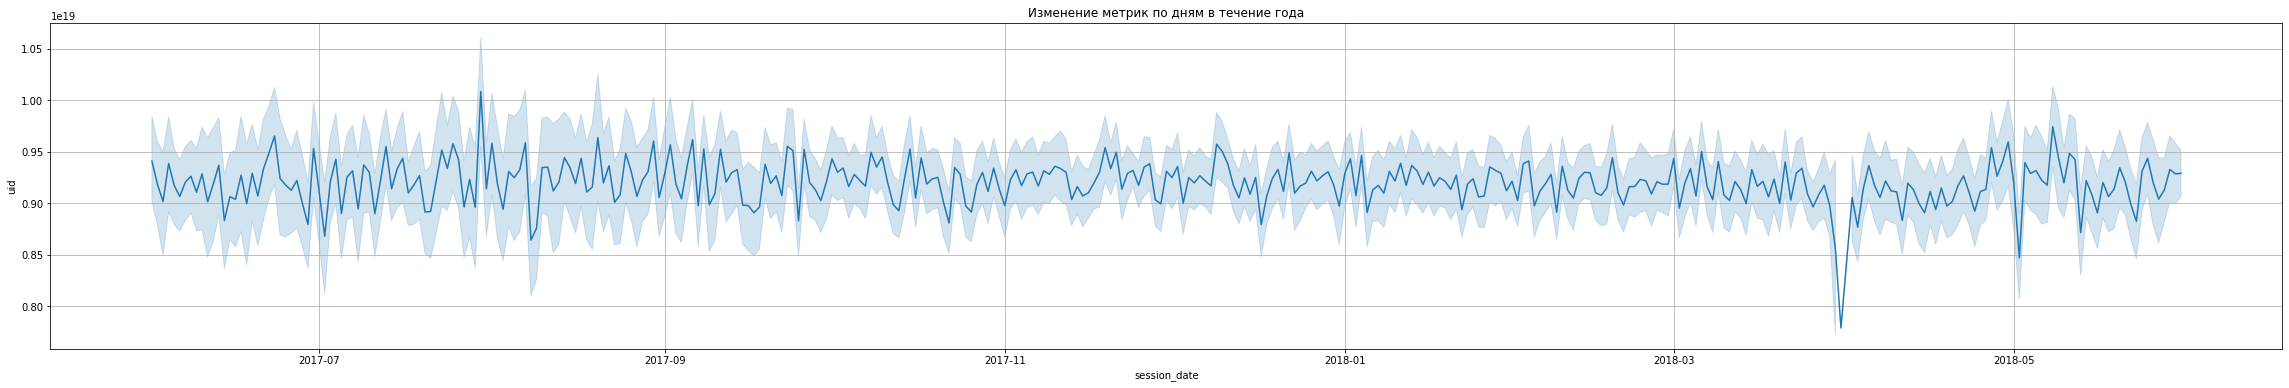

In [ ]:
plt.figure(figsize=(40,6))
sns.lineplot(data=visits, x="session_date", y="uid")
plt.title('Изменение метрик по дням в течение года')
plt.grid()
plt.show()

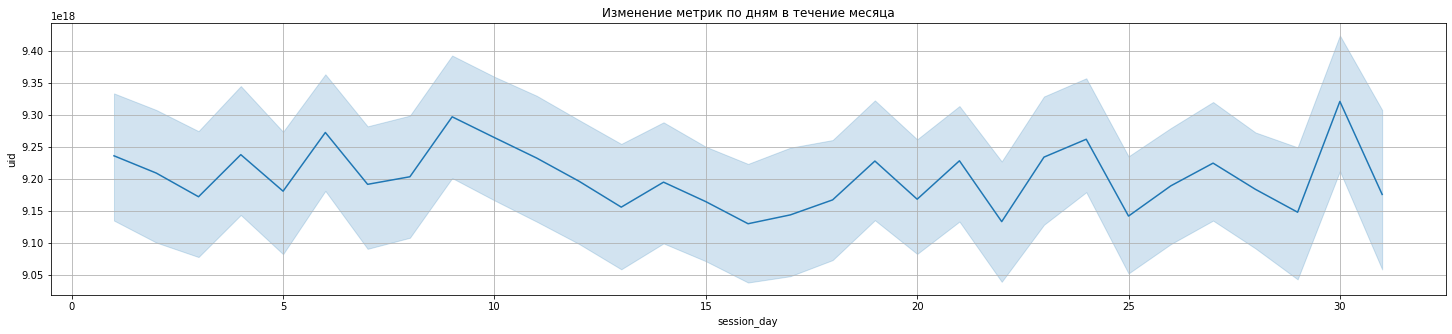

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=visits, x="session_day", y="uid")
plt.title('Изменение метрик по дням в течение месяца')
plt.grid()
plt.show()

В целом показатели количества пользователей по дням держатся в одних пределах, от 900 до 950. Присутствуют единичные выбросы. Например, резкий спад в конце марта. Скорее всего, в этот период наблюдались проблемы с сайтом.

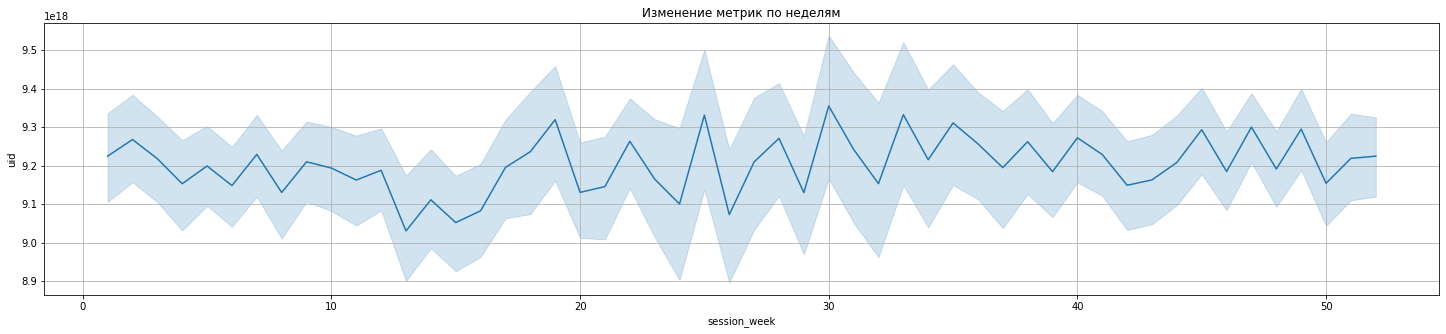

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=visits, x="session_week", y="uid")
plt.title('Изменение метрик по неделям')
plt.grid()
plt.show()

График по неделям не показывает выдающихся колебаний.


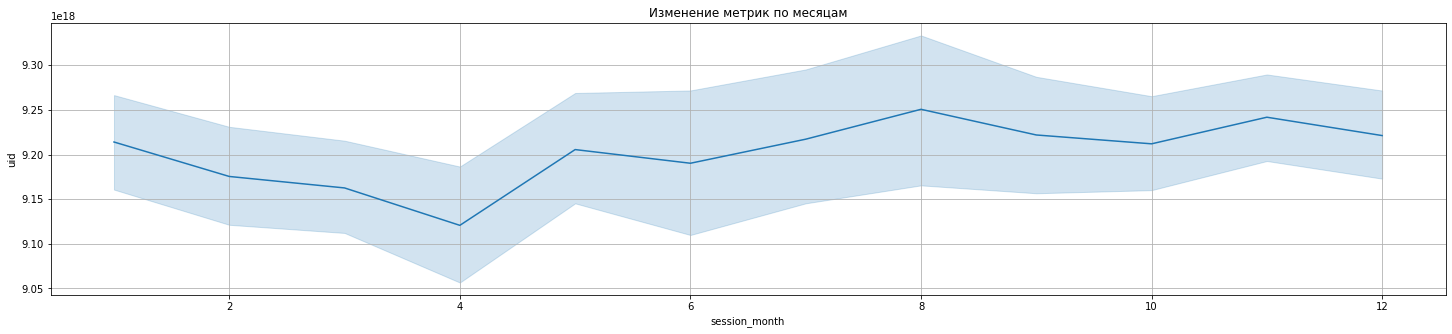

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=visits, x="session_month", y="uid")
plt.title('Изменение метрик по месяцам')
plt.grid()
plt.show()

Месячный график показывает самые низкие показатели уникальных пользователей в апреле, а самые высокие - в августе и ноябре.

В среднем сайт посещают 907 человек в день, 5724 в неделю и 23228 в месяц.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Молодец, что детально проанализировала метрики и сформулировала вывод.
</div>

**2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени.**

In [ ]:
sessions_per_day = visits.groupby('session_date')['uid'].count().mean()
int(sessions_per_day)

987

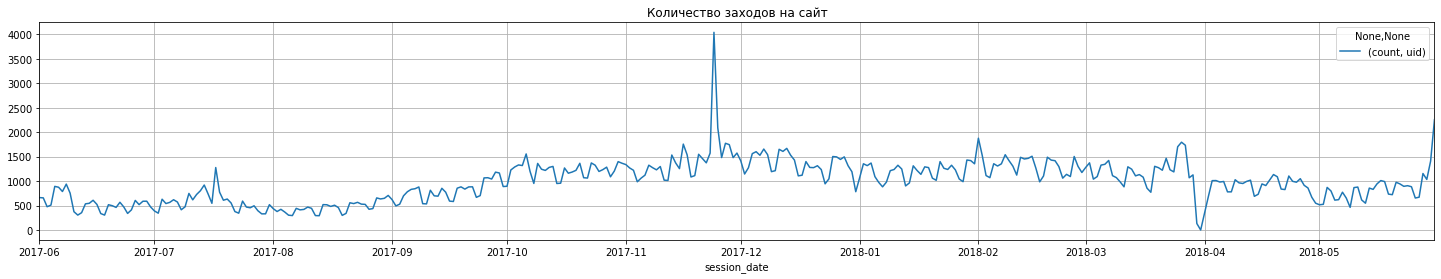

In [ ]:
pt_sessions_per_day = visits.pivot_table(index = 'session_date', values = 'uid', aggfunc = ['count'])
pt_sessions_per_day.plot(kind='line', grid=True, figsize=(25, 4))
plt.title('Количество заходов на сайт')
plt.show()

In [ ]:
sessions_per_user = len(visits) / len(visits['uid'].unique())
sessions_per_user

1.5751482453795214

В среднем пользователи заходят на сайт 987 раз за день.

Среднее количество сессий на одного пользователя в день составляет 1,57. Это неплохой показатель, пользователь заходит на сайт более 1 раза в день, значит, он может возвращаться, чтобы сделать покупку, либо проверить статус покупки, либо проверяет афишу.

До осени 2017 сайт посещало 300-600 человек с периодическим ростом до 1000 и 1500 человек. Динамика посещаемости со временем растет, и после октября 2017 держится в пределе 1000-1500 человек в день. За рассматриваемый период мы наблюдаем несколько всплесков. Предполагаем, что это связано с тем, что происходили знаменательные для аудитории события, о которых много людей хотело знать. В период 22-24 ноября произошел выброс - количество посетителей выросло до 4000 человек. Мы помним, что в это же время закупили самую дорогую рекламу, и, по всей вероятности, она сработала, но ненадолго. Уже на следующий день количество посещений снизилось до 1500 человек. Также мы видим описанный выше провал, после которого посещаемость падает и колеблется в пределах 500-1000+ человек. В июне 2018 происходит скачок, но так как данных у нас больше нет, мы не можем оценить, является ли он единичным выбросом или говорит о росте посетителей.

**Время, проведенное на сайте, продолжительность типичной пользовательской сессии**

In [ ]:
session_duration_sec = (visits['end_ts'] - visits['start_ts']).dt.seconds
print ('Средняя продолжительность сесcии, сек.:', session_duration_sec.mean())
session_duration_min = session_duration_sec.mean() / 60
print ('Средняя продолжительность сесcии, мин.:', session_duration_min)

Средняя продолжительность сесcии, сек.: 643.506488592098
Средняя продолжительность сесcии, мин.: 10.725108143201632


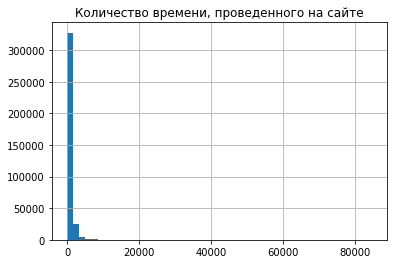

In [ ]:
session_duration_sec.hist(bins=50)
plt.title('Количество времени, проведенного на сайте')
plt.show()

Распределение неравномерно. Рассчитаем моду (значение в выборке, которое встречается чаще всего):


In [ ]:
asl = session_duration_sec.mode()[0]
print ('Средняя продолжительность сессии, сек.:', asl)

Средняя продолжительность сессии, сек.: 60


In [ ]:
session_duration_sec.describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
dtype: float64

Одна сессия длится:

В среднем 643 сек, в медиане 300 сек, в моде 60 сек. 

Средняя продолжительность сессии падает. Возможно, сайт некорректно работает в каком-то браузере или в мобильной версии.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, верное предположение :)
</div>

**Retention Rate**

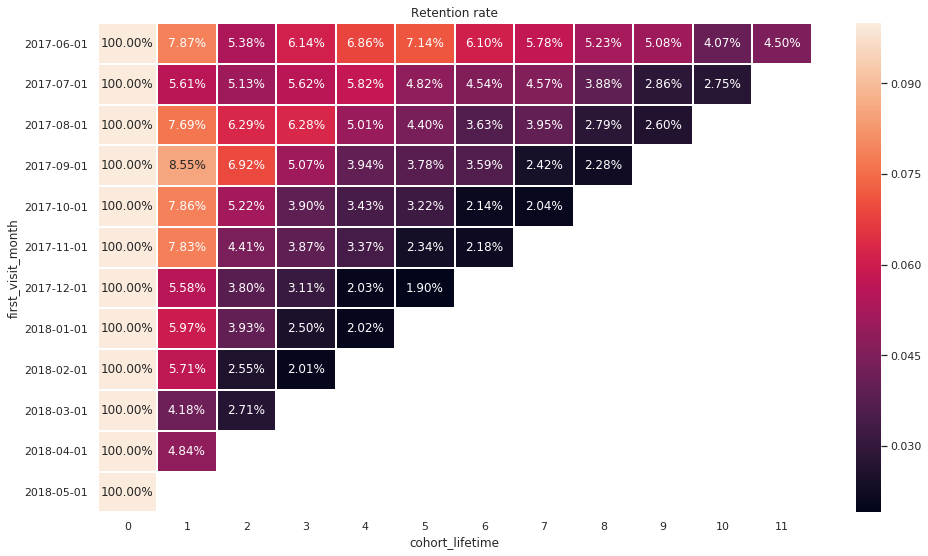

In [ ]:
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
visits = visits.merge(first_visit)
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

visits['cohort_lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

cohort = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

initial_users_count = cohort[cohort['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count.columns = ['first_visit_month', 'initial_users_count']

cohort = cohort.merge(initial_users_count)
cohort['retention'] = cohort['uid'] / cohort['initial_users_count']
retention_pivot = cohort.pivot_table(index = 'first_visit_month', 
                                                   columns = 'cohort_lifetime', values = 'retention', aggfunc = 'sum')

retention_pivot.mean() * 100

sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Retention rate')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white', vmax=0.1)
ax.set_yticklabels(retention_pivot.index.date)
plt.show()

In [ ]:
print('Средний Retention Rate на второй месяц «жизни» когорт: {0:.0%}'.format(retention_pivot[2].mean()))

Средний Retention Rate на второй месяц «жизни» когорт: 5%


Процент удержания пользователей очень низок. Так, уходит более 90% пользователей. На второй месяц жизни когорты в среднем возвращается только 5% пользователей. Получается, что сервис работает по большей части на привлечение новых юзеров.
Спустя 6 месяцев пользователей остается 2 - 6%, причем начиная с 4 месяца жизни когорты процент удержания снижается с каждой новой когортой. В итоге от изначального набора пользователей остается 4,8 - 1,9%. 
Это может быть связано как с недостаточно эффективной маркетинговой стратегией, выборот неэффективных источников трафика, ухудшением качества работы службы поддержки, так и со спецификой самого портала Яндекс.Афиша: постоянные пользователи - это те люди, которые заинтересованы регулярно получать информацию о событиях и премьерах. Но, как правило, людей интересуют конкретные события, например, концерт любимой группы, что происходит довольно нечасто, а, следовательно, нет потребности постоянно изучать афишу. 

**2.2. Метрики электронной коммерции**

**Количество времени с момента первого посещения сайта до совершения покупки.**

In [ ]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_day,session_date,first_visit,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-09,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [ ]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


У нас уже есть даты и время первых визитов, найдем даты и время первых заказов:

In [ ]:
first_order = orders.groupby('uid').agg({'buy_ts':'min'}).rename(columns={'buy_ts':'first_purchase_date'}).reset_index()

In [ ]:
#получим таблицу с временем первых визитов и покупок
first_purchase_time = first_visit.merge(first_order, on='uid', how='inner')
first_purchase_time.head()

,uid,first_visit,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [ ]:
#найдем время первой покупки в минутах
first_purchase_time['first_purchase_time_min'] = (first_purchase_time['first_purchase_date'] - first_purchase_time['first_visit']).dt.seconds / 60
first_purchase_time.head()

,uid,first_visit,first_purchase_date,first_purchase_time_min
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


In [ ]:
first_purchase_time['first_purchase_time_min'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: first_purchase_time_min, dtype: float64

In [ ]:
first_purchase_time['first_purchase_time_min'].mode()[0]

1.0

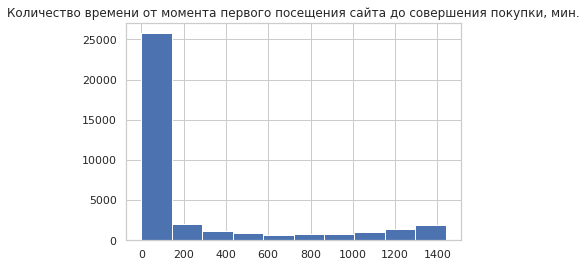

In [ ]:
first_purchase_time['first_purchase_time_min'].hist()
plt.title('Количество времени от момента первого посещения сайта до совершения покупки, мин.')
plt.show()

C момента первого посещения сайта до совершения покупки проходит:

в среднем 249 минут или 4 часа 15 минут,

в медиане 16 минут,

в моде 1 минута.

Исходя из формы распределения, есть смысл делать вывод из значения по моде, то есть пользователи совершают покупку в течение 1 минуты после захода на сайт. Это значит, что пользователь уже заходит "теплым" и знает, что ему надо и, очевидно, знает, где это лежит. Выше мы выяснили, что в среднем пользователь заходит на сайт 1,5 раза в день. Значит, вероятнее всего, в первый свой заход юзер чаще всего принимает решение о покупке.

**Среднее количество покупок на одного покупателя за определённый период.**

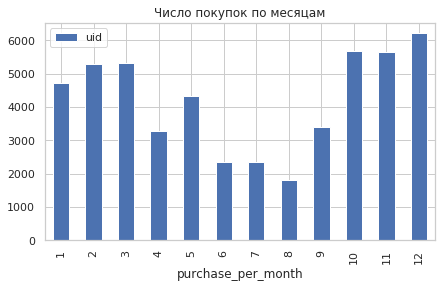

,purchase_per_month,uid
0,1,4721
1,2,5281
2,3,5326
3,4,3273
4,5,4346
5,6,2355
6,7,2363
7,8,1807
8,9,3387
9,10,5679


In [ ]:
orders['purchase_per_month'] = orders['buy_ts'].dt.month
purchase_quantaty = orders.groupby('purchase_per_month')['uid'].count().reset_index()
purchase_quantaty.plot(kind='bar', x='purchase_per_month', y='uid',figsize=(7,4))
plt.title('Число покупок по месяцам')
plt.show()
purchase_quantaty

In [ ]:
purchase_quantaty.describe()

,purchase_per_month,uid
count,12.000000,12.000000
mean,6.500000,4201.250000
std,3.605551,1511.861052
min,1.000000,1807.000000
25%,3.750000,3045.500000
50%,6.500000,4533.500000
75%,9.250000,5409.250000
max,12.000000,6218.000000


In [ ]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_month'] = orders['buy_ts'].dt.month
orders['buy_year'] = orders['buy_ts'].dt.year
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'buy_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'buy_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'buy_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'buy_ts':'count'}).mean()[0]
print('''Среднее число покупок на пользователя:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

Среднее число покупок на пользователя:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32


В среднем пользователи делают 4201 покупку в месяц. 

На одного пользователя приходится 1 покупка в день и 1,32 покупки в год. Это мало, и, похоже, что не всегда мы сможем увидеть окупаемость. Посмотрим на средний чек.

Летом совершается в 2-3 раза меньше покупок, чем в другие сезоны. Это связано с отпусками, ведь количество премьер также падает. В августе совершается минимум покупок, в декабре максимум. Корпоративы и новогодние праздники всегда заставляют покупать больше!

**Средний чек**

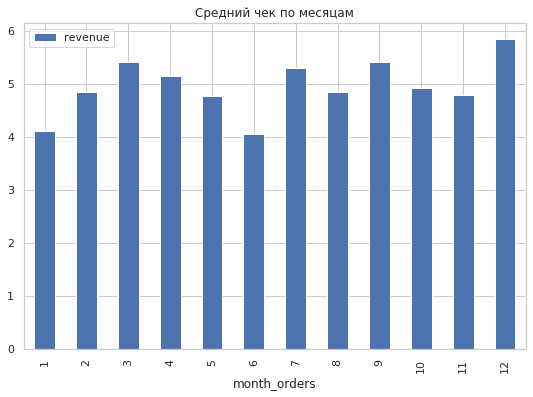

,month_orders,revenue
0,1,4.112927
1,2,4.840095
2,3,5.413930
3,4,5.150645
4,5,4.771279
5,6,4.059834
6,7,5.306589
7,8,4.847139
8,9,5.416448
9,10,4.928280


In [ ]:
orders['month_orders'] = orders['buy_ts'].dt.month
bill = orders.groupby('month_orders')['revenue'].mean().reset_index()
bill.plot(kind='bar', x='month_orders', y='revenue', figsize=(9,6))
plt.title('Средний чек по месяцам')
plt.show()
bill

In [ ]:
orders['revenue'].mean()

4.999646930477041

In [ ]:
orders['revenue'].mode()[0]

1.83

Cредний чек составляет 4,9 у.е. Чек по моде - 1,8 у.е. Самый низкий средний чек в июне, самый высокий - в декабре. Новогодние праздники лидируют не только по количеству покупок, но и по количеству потраченных денег.

**LTV**

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [ ]:
orders['month_orders'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,purchase_per_month,buy_date,buy_week,buy_month,buy_year,month_orders
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06-01,22,6,2017,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06-01,22,6,2017,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06-01,22,6,2017,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06-01,22,6,2017,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06-01,22,6,2017,2017-06-01


In [ ]:
#Найдем дату первой покупки для каждого покупателя:
first_orders = orders.groupby('uid').agg({'month_orders': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [ ]:
#Найдем количество новых покупателей:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
#Соединим таблицы с датой первой покупки и с заказами:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,purchase_per_month,buy_date,buy_week,buy_month,buy_year,month_orders,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06-01,22,6,2017,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06-01,22,6,2017,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06-01,22,6,2017,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06-01,22,6,2017,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06-01,22,6,2017,2017-06-01,2017-06-01


In [ ]:
#Сгруппируем таблицу с выручкой и первыми покупками:
cohorts = orders_new.groupby(['first_order_month','month_orders']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,month_orders,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [ ]:
#Добавим в таблицу с когортами данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()


,first_order_month,n_buyers,month_orders,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [ ]:
#Найдем валовую прибыль: 
margin_rate = 1
  
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['month_orders'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,month_orders,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [ ]:
#Найдём LTV:
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()
  

In [ ]:
#Найдем накопительный LTV за 6 месяцев жизни когорт:
monthly_costs = costs.groupby('month').sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

final_result = report_new.pivot_table( index='first_order_month', columns='age', values='ltv', aggfunc='mean')

m6_cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]

print('Средний LTV за 6 месяцев после первой покупки:', round(m6_cum_ltv, 2))

Средний LTV за 6 месяцев после первой покупки: 7.97


In [ ]:
final_result.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


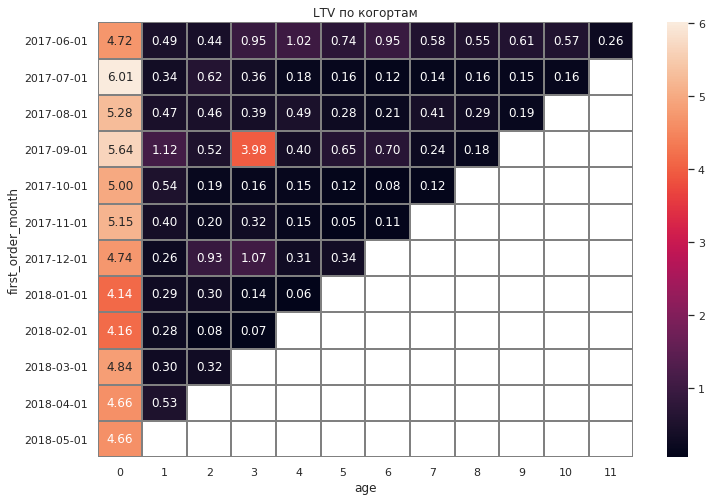

In [ ]:
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('LTV по когортам')
ax=sns.heatmap(final_result, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
ax.set_yticklabels(final_result.index.date)
plt.show()

За первые полгода каждый клиент принес в среднем 7,97 уе. Столько обойдется маркетологам привлечение клиента. 

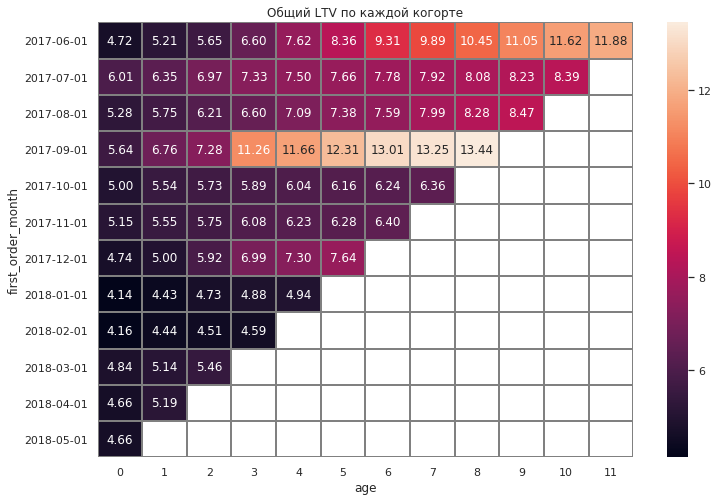

In [ ]:
final_result_cum = final_result.cumsum(axis=1).round(2)
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Общий LTV по каждой когорте')
ax=sns.heatmap(final_result_cum, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
ax.set_yticklabels(final_result_cum.index.date)
plt.show()

Каждый покупатель из когорты июня и сентября принес по 11 и 13 уе прибыли соответственно, это самые высокие показатели за весь период. Самые низкие - у октября и ноября. Cуммарный доход снижается с каждой новой когортой, особенно после января. Когорта февраля принесла меньше всего дохода.

**2.3. Маркетинговые метрики.**

**Общая сумма расходов на маркетинг. Распределение трат  по источникам.**

In [ ]:
costs['month_costs'] = costs['dt'].astype('datetime64[M]')
print('Расходы на маркетинг, у.е.:', (costs['costs'].sum()))


Расходы на маркетинг, у.е.: 329131.62


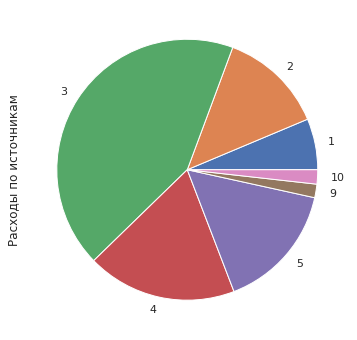

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


In [ ]:
costs_by_source = costs.groupby('source_id').sum()
costs_by_source.plot(y = 'costs', kind = 'pie', figsize = (6, 6), legend = False)
plt.ylabel('Расходы по источникам')
plt.show()
print(costs_by_source)

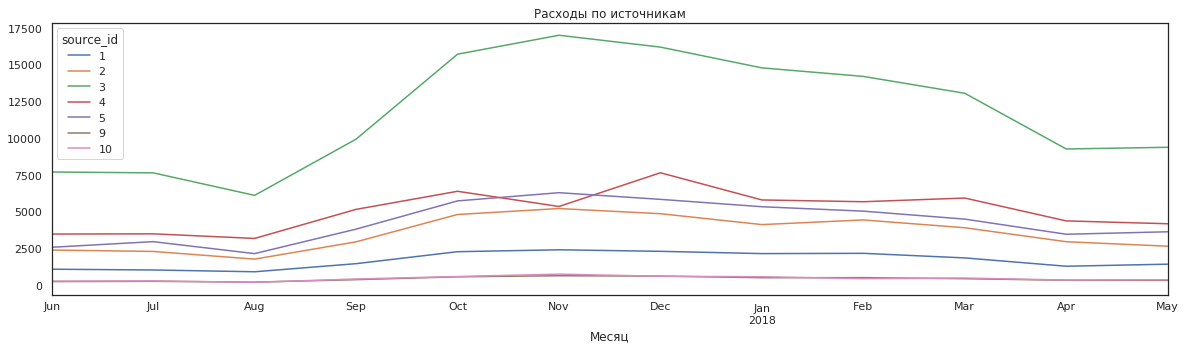

In [ ]:
costs_pivot = costs.pivot_table(index = 'month_costs', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (20,5), title = 'Расходы по источникам')
plt.xlabel('Месяц')
plt.show()

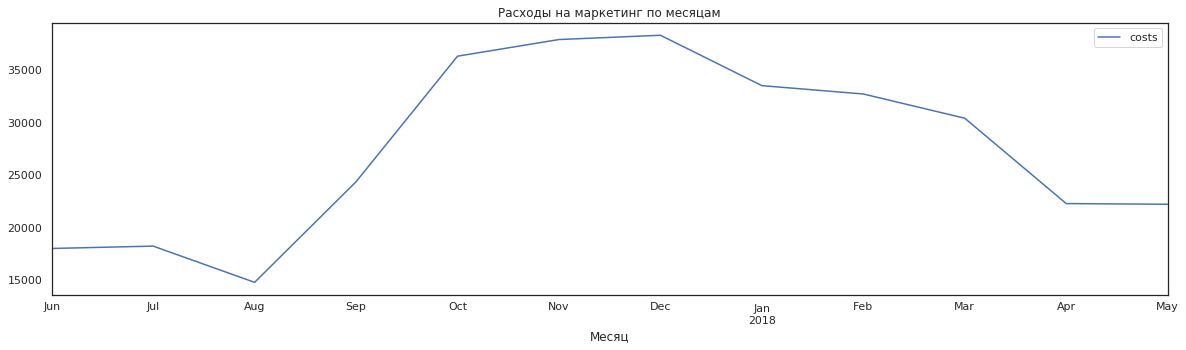

In [ ]:
costs.pivot_table(index = 'month_costs', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (20,5))
plt.xlabel('Месяц')
plt.show()

Из таблицы и графиков мы можем увидеть, как распределены расходы по источникам. Больше всего расходов ушло на рекламный источник №3 на протяжении всего года. Максимум общих расходов на маркетинг пришлось на период октябрь - декабрь 2017 года, минимум - на август 2017. После января снижались не только расходы, но и доходы.

**Средний CAC на одного покупателя для всего проекта и для каждого источника трафика.**

In [ ]:
#Вычислим сумму затрат в месяц:
costs_pivot = costs.pivot_table(index= ['month', 'source_id'], values='costs', aggfunc='sum').reset_index()

In [ ]:
#Определим, из каких источников на сайт приходят покупатели:
first_orders = orders.groupby(['uid']).agg({'month_orders': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

first_visits = visits.groupby(['uid']).agg({'session_month': 'min','source_id': 'first' }).reset_index()
first_visits.columns = ['uid', 'first_visit_month', 'source_id']

sales = pd.merge(first_visits, first_orders, on = 'uid')

cohort_sizes = sales.pivot_table(index= ['first_order_month', 'source_id'], values='uid', aggfunc= {'uid' : pd.Series.nunique}).reset_index()

cohort_sizes.columns = ['month', 'source_id', 'n_buyers']
display(cohort_sizes.head())

,month,source_id,n_buyers
0,2017-06-01,1,203
1,2017-06-01,2,271
2,2017-06-01,3,574
3,2017-06-01,4,417
4,2017-06-01,5,368


In [ ]:
new_buyers = pd.merge(cohort_sizes, costs_pivot, on = ['month', 'source_id'])

In [ ]:
# Посчитаем стоимость привлечения покупателя:
new_buyers['cac'] = new_buyers['costs'] / new_buyers['n_buyers']
print('В среднем стоимость привлечения одного покупателя равна:', round(new_buyers['cac'].mean(), 1))

В среднем стоимость привлечения одного покупателя равна: 7.9


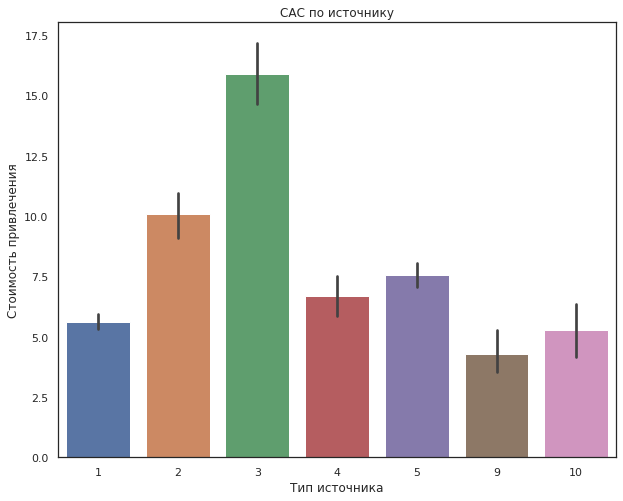

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data=new_buyers, x='source_id', y='cac')
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()


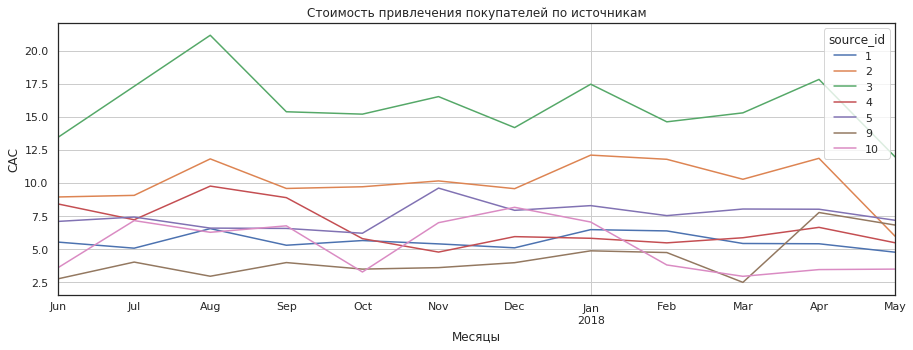

In [ ]:
# Посмотрим, как стоимость привлечения клиента распределена по месяцам и источникам:
new_buyers.pivot_table(index= 'month',columns = 'source_id', values='cac').plot(figsize=(15,5), grid = True).set_title('Стоимость привлечения покупателей по источникам')
plt.ylabel('САС')
plt.xlabel('Месяцы')
plt.show()


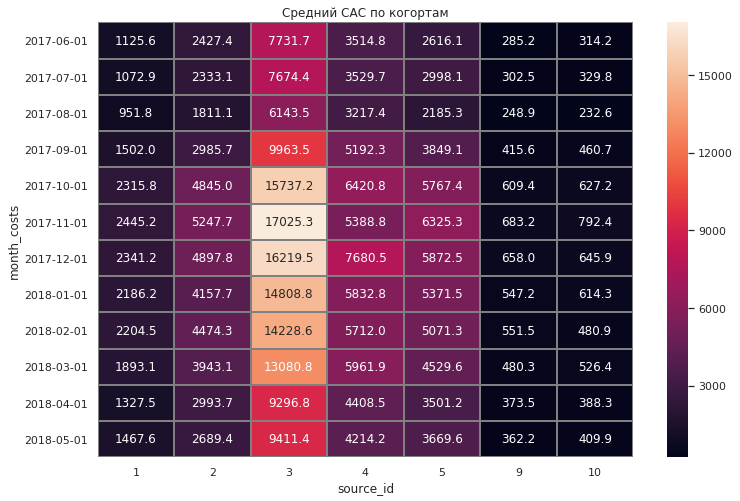

In [ ]:
costs_by_source = (costs
                              .groupby(['source_id', 'month_costs'])['costs']
                              .sum()
                              .reset_index()
                             )
costs_by_source['date'] = costs_by_source['month_costs'].astype('datetime64[M]')
costs_by_source = costs_by_source.groupby(['source_id', 'month_costs'])['costs'].sum().reset_index()
costs_by_source_pivot = costs_by_source.pivot_table(index='month_costs', columns='source_id', values='costs', aggfunc='sum')
plt.figure(figsize=(12, 8))
plt.title('Средний САС по когортам')
ax=sns.heatmap(costs_by_source_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
ax.set_yticklabels(final_result_cum.index.date)
plt.show()

В среднем стоимость привлечения одного покупателя равна 7.9
Самые дешевые источники по привлечению клиентов № 9, 10 и 1. Наиболее высокий САС у источников № 3, затем № 2. В третий источник больше всего вкладывались во все периоды, но особенно с октября по март.


In [ ]:
#Рассчитаем, сколько покупателей привел каждый источник привлечения:
visits_by_source = visits.query('start_ts == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'}).rename(columns={'uid':'customers'})
customers_by_source.reset_index()

,source_id,customers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


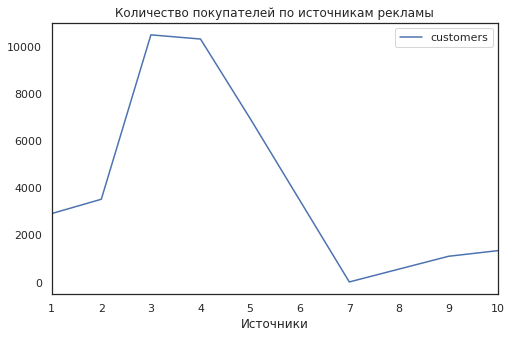

In [ ]:
customers_by_source.plot(title = 'Количество покупателей по источникам рекламы', figsize = (8,5))
plt.xlabel('Источники')
plt.show()

Больше всего покупателей (больше 10 тыс) пришло от 3 и 4 источников рекламы. Меньше всего - от 9. 6 и 7 выпали из расчетов. При этом источник № 3 является самым дорогостоящим. Он показывает прямую зависимость - чем больше денег вложили в рекламу, тем больше покупателей получили. Но источник № 4 привел практически столько же покупателей, но стоил бизнесу в 2,2 раза дешевле. Вывод: источник № 4 является самым эффективным по соотношению потаченных средств и количеству привлеченных покупателей.

**ROMI по когортам в разрезе источников.**

In [ ]:
#Для рассчета ROMI найдем CAC и LTV:
costs_pivot = costs.pivot_table(index= ['month', 'source_id'], values='costs', aggfunc='sum').reset_index()

In [ ]:
first_orders = orders.groupby(['uid']).agg({'month_orders': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

first_visits = visits.groupby(['uid']).agg({'session_month': 'min','source_id': 'first' }).reset_index()
first_visits.columns = ['uid', 'first_visit_month', 'source_id']

sales = pd.merge(first_visits, first_orders, on = 'uid')

In [ ]:
cohort_sizes = sales.pivot_table(index= ['first_order_month', 'source_id'], values=['uid'], aggfunc= {'uid' : lambda x: len(x.unique())}).reset_index()
cohort_sizes.columns = ['first_order_month', 'source_id', 'n_buyers']
cohort_sizes.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,203
1,2017-06-01,2,271
2,2017-06-01,3,574
3,2017-06-01,4,417
4,2017-06-01,5,368


In [ ]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders = pd.merge(first_visits, orders_new, on = 'uid')


In [ ]:
cohorts = orders.groupby(['first_order_month','month_orders', 'source_id']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()


,first_order_month,month_orders,source_id,revenue
0,2017-06-01,2017-06-01,1,1168.45
1,2017-06-01,2017-06-01,2,1551.76
2,2017-06-01,2017-06-01,3,2466.71
3,2017-06-01,2017-06-01,4,2039.64
4,2017-06-01,2017-06-01,5,1787.68


In [ ]:
report = pd.merge(cohort_sizes, cohorts, on= ['first_order_month', 'source_id'])

In [ ]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['month_orders'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [ ]:
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(index='first_order_month', columns=['age', 'source_id'], values='ltv', aggfunc='mean').round()


In [ ]:
costs_pivot.columns = ['first_order_month', 'source_id', 'costs']
report_new = pd.merge(report, costs_pivot, on = ['first_order_month', 'source_id'])
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,source_id,n_buyers,month_orders,revenue,gp,age,ltv,costs,cac
0,2017-06-01,1,203,2017-06-01,1168.45,1168.45,0,5.755911,1125.61,5.544877
1,2017-06-01,1,203,2017-07-01,362.94,362.94,1,1.787882,1125.61,5.544877
2,2017-06-01,1,203,2017-08-01,153.72,153.72,2,0.757241,1125.61,5.544877
3,2017-06-01,1,203,2017-09-01,695.88,695.88,3,3.427980,1125.61,5.544877
4,2017-06-01,1,203,2017-10-01,760.74,760.74,4,3.747488,1125.61,5.544877


In [ ]:
#Рассчитаем ROMI:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(index= ['first_order_month','source_id'], columns= 'age', values='romi', aggfunc='mean').reset_index()

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.04,1.36,1.50,2.12,2.79,3.43,4.29,4.64,5.04,5.60,6.14,6.24
2017-07-01,1.51,1.71,2.49,2.71,2.79,2.93,3.01,3.10,3.18,3.26,3.40,NaN
2017-08-01,0.93,0.99,1.01,1.08,1.12,1.14,1.21,1.28,1.30,1.34,NaN,NaN
2017-09-01,1.43,1.60,1.86,2.11,2.22,2.27,2.73,2.88,2.98,NaN,NaN,NaN
2017-10-01,1.07,1.27,1.37,1.43,1.46,1.47,1.51,1.55,NaN,NaN,NaN,NaN
2017-11-01,1.07,1.16,1.28,1.35,1.38,1.38,1.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.87,0.91,0.97,1.01,1.04,1.07,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.94,1.13,1.18,1.30,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.78,0.98,1.00,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.64,0.75,0.86,1.17,1.48,1.67,1.92,2.14,2.27,2.39,2.47,2.59
2017-07-01,0.78,0.86,0.89,0.97,1.01,1.02,1.05,1.06,1.09,1.11,1.16,NaN
2017-08-01,0.48,0.56,0.61,0.61,0.64,0.66,0.66,0.68,0.71,0.72,NaN,NaN
2017-09-01,0.91,1.64,1.90,5.14,5.40,5.85,6.15,6.26,6.34,NaN,NaN,NaN
2017-10-01,0.77,1.01,1.05,1.09,1.12,1.17,1.18,1.20,NaN,NaN,NaN,NaN
2017-11-01,0.62,0.71,0.75,0.82,0.84,0.86,0.87,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.77,0.91,1.64,2.52,2.75,3.01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.36,0.38,0.45,0.46,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.38,0.41,0.42,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.32,0.33,0.33,0.35,0.37,0.37,0.38,0.38,0.38,0.39,0.39,0.39
2017-07-01,0.30,0.31,0.31,0.32,0.32,0.32,0.32,0.33,0.33,0.33,0.34,NaN
2017-08-01,0.26,0.27,0.27,0.28,0.29,0.29,0.29,0.29,0.30,0.30,NaN,NaN
2017-09-01,0.32,0.33,0.34,0.34,0.34,0.34,0.35,0.35,0.35,NaN,NaN,NaN
2017-10-01,0.29,0.30,0.31,0.31,0.32,0.33,0.33,0.33,NaN,NaN,NaN,NaN
2017-11-01,0.29,0.32,0.32,0.34,0.34,0.34,0.36,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.30,0.31,0.31,0.32,0.32,0.33,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.23,0.23,0.24,0.24,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.26,0.28,0.29,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.58,0.59,0.60,0.63,0.65,0.67,0.69,0.71,0.73,0.75,0.82,0.83
2017-07-01,0.88,0.89,0.92,0.96,0.98,0.99,1.01,1.02,1.06,1.08,1.09,NaN
2017-08-01,0.51,0.53,0.55,0.59,0.62,0.65,0.65,0.74,0.75,0.76,NaN,NaN
2017-09-01,0.58,0.62,0.63,0.64,0.64,0.68,0.70,0.71,0.72,NaN,NaN,NaN
2017-10-01,0.76,0.79,0.82,0.84,0.87,0.88,0.89,0.90,NaN,NaN,NaN,NaN
2017-11-01,1.10,1.18,1.20,1.28,1.33,1.34,1.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.70,0.71,0.73,0.74,0.75,0.76,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.65,0.67,0.68,0.69,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.76,0.78,0.78,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.68,0.76,0.91,1.02,1.13,1.21,1.29,1.35,1.44,1.51,1.55,1.56
2017-07-01,0.71,0.75,0.79,0.81,0.82,0.83,0.84,0.85,0.85,0.86,0.86,NaN
2017-08-01,0.76,0.88,1.03,1.15,1.33,1.43,1.49,1.53,1.57,1.60,NaN,NaN
2017-09-01,0.76,0.78,0.79,0.82,0.82,0.83,0.84,0.85,0.85,NaN,NaN,NaN
2017-10-01,0.85,0.88,0.90,0.91,0.93,0.95,0.98,1.01,NaN,NaN,NaN,NaN
2017-11-01,0.47,0.48,0.49,0.50,0.51,0.52,0.52,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.65,0.66,0.68,0.68,0.69,0.69,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.48,0.53,0.62,0.63,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.57,0.59,0.60,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age,0,1,2,3,4,5,6,7,8,9,10
first_order_month,,,,,,,,,,,
2017-06-01,1.23,1.30,1.32,1.37,1.41,1.47,1.49,1.50,1.55,1.59,1.61
2017-07-01,1.39,1.48,1.62,1.70,1.85,1.87,1.93,1.96,2.01,NaN,2.03
2017-08-01,1.62,1.95,2.22,2.41,2.57,2.71,2.78,3.07,3.87,4.20,NaN
2017-09-01,0.96,1.12,1.20,1.23,1.26,NaN,1.27,NaN,1.28,NaN,NaN
2017-10-01,1.18,1.27,1.30,1.34,1.36,1.40,1.40,1.42,NaN,NaN,NaN
2017-11-01,1.16,1.22,1.25,1.31,1.32,1.34,1.36,NaN,NaN,NaN,NaN
2017-12-01,0.92,1.01,1.06,1.14,1.15,1.16,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.64,0.67,0.75,0.76,0.77,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.80,0.83,0.84,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


age,0,1,2,3,4,5,6,7,8,11
first_order_month,,,,,,,,,,
2017-06-01,0.61,0.65,NaN,NaN,0.65,NaN,NaN,NaN,0.65,0.66
2017-07-01,0.45,0.46,NaN,0.47,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.74,0.75,0.81,NaN,NaN,NaN,0.83,0.87,NaN,NaN
2017-09-01,0.34,0.35,0.36,0.40,0.40,0.40,0.41,0.42,0.43,NaN
2017-10-01,0.79,0.81,0.83,0.83,0.84,NaN,0.85,NaN,NaN,NaN
2017-11-01,0.63,0.64,0.64,0.66,0.67,0.68,0.68,NaN,NaN,NaN
2017-12-01,0.45,NaN,0.45,NaN,NaN,0.46,NaN,NaN,NaN,NaN
2018-01-01,0.44,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.67,0.68,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN


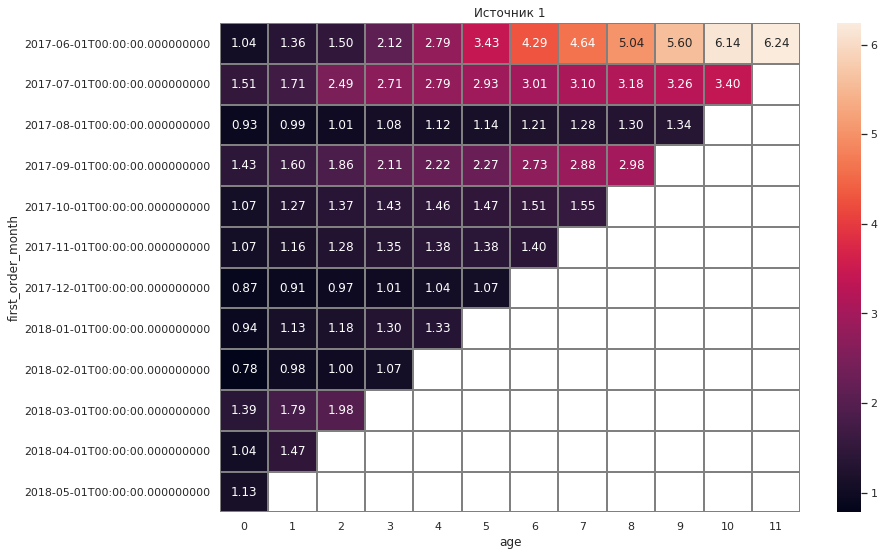

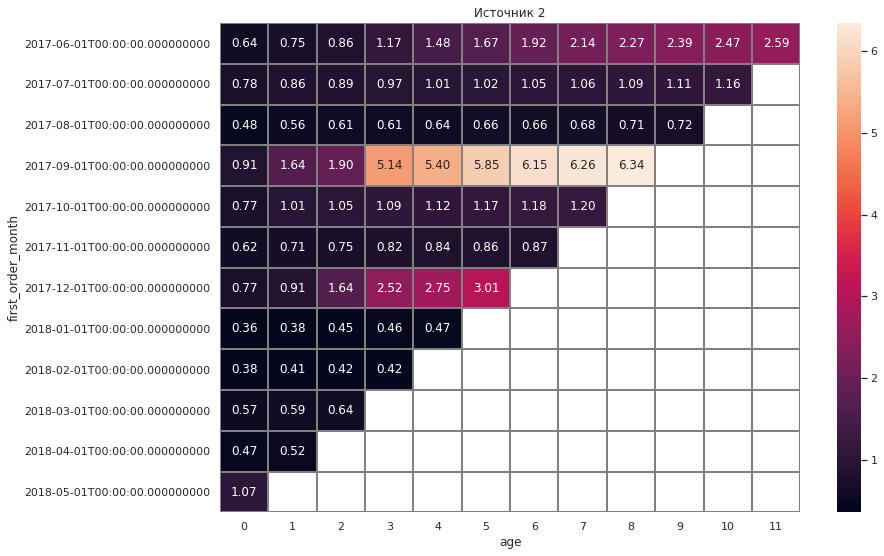

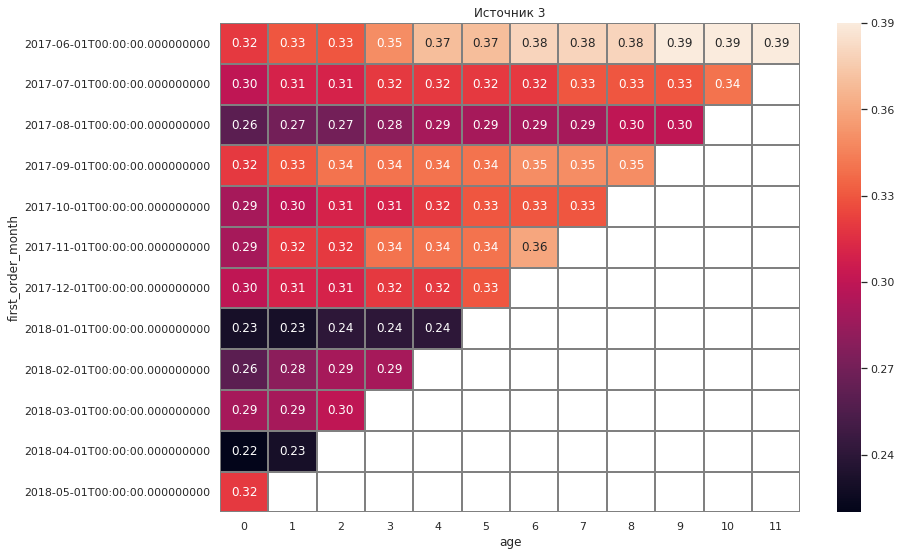

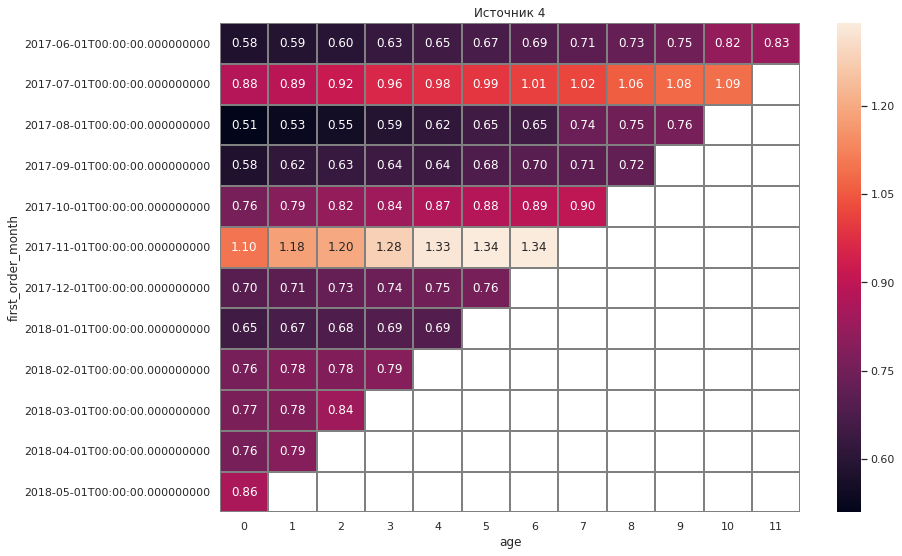

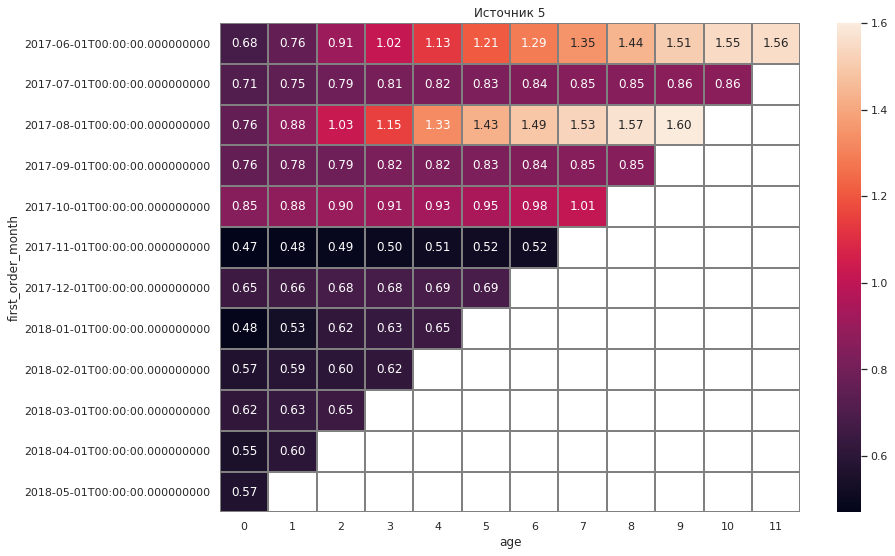

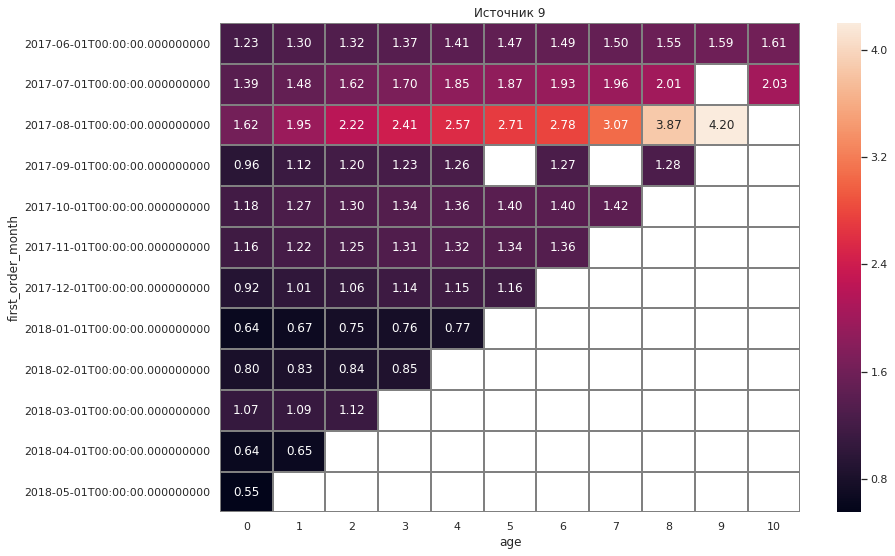

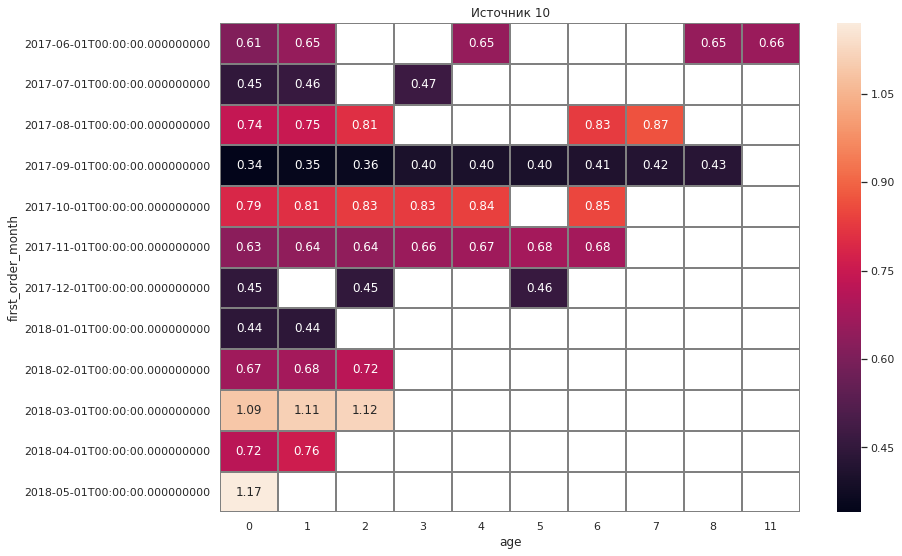

In [ ]:
#Посмотрим на окупаемость когорт:
for source in report_new.source_id.unique():
    output = report_new.query('source_id == @source').pivot_table(
    index = 'first_order_month',
    columns = 'age',
    values = 'romi',
    aggfunc = 'mean').cumsum(axis=1).round(2)
    display(output)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title("Источник " + str(source))
    sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray');


По 1-ому источнику все когорты окупаются за 1-3 месяца. По 2-ому источнику три когорты окупаются за 2 месяца, но некоторые не окупились за весь период жизни. По 3-му источнику, самому дорогостоящему для бизнеса ни одна когорта не окупилась. По 4-ому источнику окупилось две когорты, причем ноябрьская окупалась каждый месяц. По 5-ому источнику в две когорты стали окупаться после 2-3 месяца жизни, и прододжали окупаться. По 9-ому источнику многие когорты окупились в первом же месяце, но 4 из них не окупились вовсе. По 10-ому источнику окупились только 2 когорты.

**3. Выводы и рекомендации**


Мы получили чистые данные, без пропусков и дубликатов, в итоге работа проходила с тремя основными датафреймами, которые содержали информацию о визитах на сайт, заказах и расходах на рекламу.

В день на сайт заходит в среднем 907 уникальных пользователей, в неделю - 5716, в месяц - 23228. Самые низкие показатели уникальных пользователей в апреле, а самые высокие - в августе и ноябре. 

В среднем пользователи заходят на сайт 987 раз за день.
Средняя продолжительность сессии составляет 10 минут. Основная масса сессий длится 0 секунд. Это может быть связано с ошибкой подключения, переходами для совершения покупок на marketplace вне  пространства сайта.

Процент удержания пользователей очень низок. Так, уходит более 90% пользователей. На второй месяц жизни когорты остается 2,71% - 6,92%. Спустя 6 месяцев пользователей остается 2 - 6%, причем начиная с 4 месяца жизни когорты процент удержания снижается с каждой новой когортой. В итоге от изначального набора пользователей остается 4,8 - 1,9%. Это может быть связано как с недостаточно эффективной маркетинговой стратегией, выбором неэффективных источников трафика, ухудшением качества работы службы поддержки, так и со спецификой самого портала Яндекс.Афиша.

C момента первого посещения сайта до совершения покупки проходит Это значит, что пользователь уже заходит "теплым" и знает, что ему надо и, очевидно, знает, где это лежит. Также мы выяснили, что в среднем пользователь заходит на сайт 1,5 раза в день. Значит, вероятнее всего, в первый свой заход юзер чаще всего принимает решение о покупке.
 
В среднем на пользователя приходится 4201 покупок в месяц. Летом совершается в 2-3 раза меньше покупок, чем в другие сезоны. Это связано с отпусками, ведь количество премьер также падает. В августе совершается минимум покупок, в декабре максимум.
Cредний чек составляет 4,9 у.е. Чек по моде - 1,8 у.е. Самый низкий средний чек в июне, самый высокий - в декабре. 
 
За первые полгода каждый клиент принес в среднем 7,97 уе. Столько обойдется маркетологам привлечение клиента.
 
Каждый покупатель из когорты июня и сентября принес по 11 и 13 уе прибыли соответственно, это самые высокие показатели за весь период. Самые низкие - у октября и ноября. Суммарный доход снижается с каждой новой когортой, особенно после января. Когорта февраля принесла меньше всего дохода.
 
Всего на рекламу было потрачено: 329131.6 уе. Максимум общих расходов на маркетинг пришлось на период октябрь - декабрь 2017 года, минимум - на август 2017. После января снижались не только расходы, но и доходы. Самые дешевые источники по привлечению клиентов № 9, 10, они же привели минимальное количество покупателей. 
Больше всего покупателей (больше 10 тыс) пришло от 3 и 4 источников рекламы. При этом источник № 3 является самым дорогостоящим. Он показывает прямую зависимость - чем больше денег вложили в рекламу, тем больше покупателей получили. Но источник № 4 привел практически столько же покупателей, но стоил бизнесу в 2,2 раза дешевле. Вывод: источник № 4 является эффективнее по соотношению цена-качество и окупаемости. Источник № 1 привел в 3 раза меньше покупателей, чем № 3 и 4, но он окупал себя каждый месяц и стоил бизнесу в 7 раз дешевле третьего и в 3 раза дешевле четвертого. Следует отметить, что в анализе участвовали не все источники. Ниже представлен список всех источников, по которым были доступны данные, но их не хватило для анализа 6 и 7 источника, активности и заказов по ним было крайне мало.

Не следует повышать затраты на 3-ий источник, так как когорты по нему не окупаются, при этом на данный момент он является самым дорогим. Рекомендуем инвестировать в 1-ый источник, он недорогой,  когорты окупаются быстро. Когорта июня принесла до 6 раз больше прибыли, нежели было инвестировано, когорты июля и сентября - в 2-3 раза больше. Стоит обратить внимание на 9-ый источник. В нем 6 когорт окупились в первый же месяц, августовская была самой прибыльной, при этом вложений в него мало.

Все когорты демонстрируют тенденцию к уверенному дальнейшему снижению числа пользователей. Самая многочисленная когорта возникла в ноябре 2017, это объяснимо высокими затратами на маркетинг - за октябрь и ноябрь.Самая малочисленная  когорта - за август 2017 года. Для всех когорт основной объем покупок приходится на первый месяц жизни. Дороже всего новые покупатели обходились в августе 2017, а также январе и апреле 2018.

